# Avichai Chen - Assigment 2

### Import of different libraries for the benefit of the assignment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import re

C:\Users\malka\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### The data must be read into a dataframe called data, Each row in the dataset describes an event (action) performed by a certain user at a certain time during a visit (session) to an online shopping site.
###  Each user (user_id) surfs during his visits to the site (visit identified by user_session) and performs various actions (identified by event_id) such as viewing a product (view), adding a product to a cart (cart), removing a product from a cart (remove_from_cart) on different products (product_id).

In [2]:
# Read the data
data = pd.read_csv("matala2_cosmetics_2019-Nov.csv",low_memory=False )

# Take random samples
short_data = data.sample(n=50000, random_state=42).copy()

# switch the date to datetime
short_data['event_time']= pd.to_datetime(short_data['event_time'])

# Check
short_data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
683458,2019-11-06 08:55:46+00:00,cart,5861746,1487580008246412266,NaN,NaN,9.05,568108585,958a0c7b-12e3-422a-956c-307020419ecd
1096300,2019-11-08 16:42:24+00:00,cart,5768981,1487580006300255120,NaN,irisk,82.54,569043579,1bb150d6-db0a-493d-b92a-5ddba3ca1e53
3476075,2019-11-24 11:02:19+00:00,view,5609124,1487580012994363565,NaN,NaN,7.62,560966475,08d5d3ea-fabc-4249-89e5-ee8cd1a83a75
2745003,2019-11-21 06:25:28+00:00,cart,5905539,1487580006317032337,NaN,runail,5.08,456260479,fe0f88e9-e8e1-4f97-af0f-aa1dfc5e4577
2403283,2019-11-18 18:00:12+00:00,view,5782135,1638456119066100510,NaN,pole,4.11,399415449,b147acc7-1249-4224-8d12-fb7cf00b56b8
3713163,2019-11-25 16:18:59+00:00,view,5906756,1791442895991997390,NaN,matreshka,1.27,576052502,57ef5648-f232-4887-8095-ca8baed03021
4177463,2019-11-28 15:08:09+00:00,cart,5820785,1487580006317032337,NaN,NaN,5.27,545029320,34de469c-c982-4193-99fd-6b7d8416a89b
3666642,2019-11-25 10:42:19+00:00,view,5746848,2193074740686488401,furniture.bathroom.bath,irisk,49.29,463772042,cc0e44c0-2a46-46d0-892e-faa5f7d7f8cd
1071213,2019-11-08 13:38:20+00:00,view,5814050,1487580005092295511,NaN,grattol,6.27,544203015,87b5b255-a584-49a4-9b98-642e418413ca
4198021,2019-11-28 16:56:00+00:00,view,5854832,1602943681873052386,NaN,grattol,5.08,441704201,0a7b64db-13c3-4f88-bb9f-db524516621b


### Question 1:
### A new column named duration_to_next_event must be added to the dataframe that will hold the time in seconds from an event to the next event in the same visit. For the last event in the visit, the value in this field will be 0 (because in this case there is no additional event that cannot be calculated for the next event in the visit).

In [11]:
# Sort and group by user session and event time, diff it for the duration and shift it for the last visit to be 0.
data1 = short_data.sort_values(['user_session', 'event_time'])  
data1['duration_to_next_event'] = data1.groupby('user_session')['event_time'].diff().shift(periods=-1).fillna(pd.Timedelta(seconds=0))

# Check
data1.head(10)
#data1[data1["user_session"]=="0002ad82-84d0-40be-8d1a-b48de3ef8fe3"]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
853411,2019-11-07 11:18:15+00:00,view,59996,1487580012927254698,NaN,NaN,4.13,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,0 days 00:00:00
845308,2019-11-07 10:34:08+00:00,cart,5815833,1487580005008409427,NaN,f.o.x,6.03,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,0 days 00:21:56
849376,2019-11-07 10:56:04+00:00,cart,5844320,1487580006317032337,NaN,NaN,1.57,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,0 days 00:10:01
851071,2019-11-07 11:06:05+00:00,cart,5855282,2195085255034011676,NaN,severina,1.73,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,0 days 00:46:27
860845,2019-11-07 11:52:32+00:00,cart,5803297,1487580011425693811,NaN,NaN,0.57,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,0 days 00:39:00
870586,2019-11-07 12:31:32+00:00,purchase,5727778,1487580005008409427,NaN,f.o.x,6.03,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,0 days 00:00:00
2694766,2019-11-20 19:28:27+00:00,view,5854812,1602943681873052386,NaN,grattol,5.24,574098461,0003a26d-39db-4e12-84be-283c32c2bb73,0 days 00:00:00
2351506,2019-11-18 12:02:06+00:00,cart,5813892,1842735758805303837,NaN,beauty-free,2.37,572991401,0003f3a6-4d9a-462e-bfe1-6ac66f81fbe2,0 days 00:00:00
2588147,2019-11-20 03:57:17+00:00,view,5889184,1897124478404526487,NaN,NaN,2.86,278482846,0005bcaf-d68d-48df-a2f3-c9c2b18dd643,0 days 00:00:00
3640895,2019-11-25 07:19:30+00:00,view,5886198,1487580009286598681,NaN,NaN,0.63,562938528,0005d374-dd22-4056-82b1-9722cd480db3,0 days 00:00:00


### Question 2:
### A column called funnel_number must be added. A panel is a sequence of visits (sessions) of the same user on the website that are not more than 5 days apart.

In [13]:
# Sort and group by user id and event time, create duration_days -> bigger than 5 -> funnel number
data2 = data1.sort_values(['user_id', 'event_time']) 
data2['duration_days']= data2.groupby('user_id')['event_time'].diff().apply(lambda x: pd.Timedelta(x).days)
data2['bigger_than5']= np.where(data2['duration_days']>=5,1,0)
data2['funnel_number']= data2.groupby('user_id')['bigger_than5'].cumsum()+1

# Check
data2.head(10)
#data2[data2["user_id"]==20554973]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_days,bigger_than5,funnel_number
1875721,2019-11-14 15:29:18+00:00,view,5561494,1487580007852147670,NaN,NaN,10.48,20554973,e6f2e7c1-1060-4e8f-87eb-80c85cf2fd48,6 days 23:40:45,NaN,0,1
2854476,2019-11-21 15:10:03+00:00,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.78,20554973,e6f2e7c1-1060-4e8f-87eb-80c85cf2fd48,0 days 00:00:00,6.0,1,2


### Question 3:
### You must also add a column named index_in_funnel that will contain the number of the visit (session) in the same panel. Of course, if there are several events in the same visit - they will all receive the same index_in_funnel value.


In [14]:
# Copy and drop columns for unique index
data3 = data2.copy()
data3.drop_duplicates(subset='user_session', inplace=True)
data3['index_in_funnel'] = data3.groupby(['user_id','funnel_number'])['user_session'].cumcount() + 1
data3 = data3.drop(['event_time', 'event_type', 'product_id', 'category_id','category_code', 'brand', 'price', 'user_id', 'duration_days','bigger_than5', 'funnel_number','duration_to_next_event'], axis=1)

# Save it for q6
data_for_6 = data3.copy()

# Merge to get the full data
data3 = pd.merge(data2, data3, on='user_session', how='right')

# Check
data3.head(10)
#data3[data3["user_id"]==9794320]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_days,bigger_than5,funnel_number,index_in_funnel
0,2019-11-22 06:57:54+00:00,cart,5724658,1487580005427839846,NaN,irisk,2.48,9794320,1caa56ab-bd6f-4e0f-957a-30d19ba4f4c0,0 days,NaN,0,1,1
1,2019-11-23 05:01:56+00:00,view,5724282,1487580005427839846,NaN,irisk,2.35,9794320,566c4346-f4d4-420f-a2b7-a41ffbfb0dcd,0 days,0.0,0,1,2
2,2019-11-28 19:39:50+00:00,view,5896429,1487580009051717646,NaN,jessnail,34.4,9794320,09894a4f-860e-448c-83d5-691590d28617,0 days,5.0,1,2,1


### Question 4:
### In the price column prices (float) should appear, but in some of the lines strings appear such as for example 2.44 sale, net 5.44. Texts beyond the price itself must be removed from the column and the value in the field must be converted to float. Regular expressions must be used for this.

In [6]:
# Create function for convert from item to float
def convert_to_float (item):
    pattern = r"[^0-9.]"
    return float(re.sub(pattern, "", item))

# Copy and fix the columns of price
data4 = data2.copy()
data4['price'] = data4['price'].apply(convert_to_float) 

# Check
data4.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_days,bigger_than5,funnel_number
2971484,2019-11-22 06:57:54+00:00,cart,5724658,1487580005427839846,NaN,irisk,2.48,9794320,1caa56ab-bd6f-4e0f-957a-30d19ba4f4c0,0 days 00:00:00,NaN,0,1
3225215,2019-11-23 05:01:56+00:00,view,5724282,1487580005427839846,NaN,irisk,2.35,9794320,566c4346-f4d4-420f-a2b7-a41ffbfb0dcd,0 days 00:00:00,0.0,0,1
4233776,2019-11-28 19:39:50+00:00,view,5896429,1487580009051717646,NaN,jessnail,34.40,9794320,09894a4f-860e-448c-83d5-691590d28617,0 days 00:00:00,5.0,1,2
1940085,2019-11-15 05:56:31+00:00,view,5853467,1487580008263189483,NaN,NaN,13.37,10968431,14322711-e16b-4758-ab71-148fce9275d5,0 days 00:00:00,NaN,0,1
2120999,2019-11-16 17:15:34+00:00,view,5869134,1783999064136745198,NaN,cosmoprofi,6.35,13392135,597b95ff-4964-44f7-a259-6028b45c6f9c,0 days 00:00:00,NaN,0,1
529825,2019-11-05 08:45:52+00:00,view,5836522,1487580013522845895,NaN,nagaraku,0.40,14297993,a3bcb3c1-d3a3-49e5-b99b-7428f553a59b,0 days 00:00:00,NaN,0,1
1875721,2019-11-14 15:29:18+00:00,view,5561494,1487580007852147670,NaN,NaN,10.48,20554973,e6f2e7c1-1060-4e8f-87eb-80c85cf2fd48,6 days 23:40:45,NaN,0,1
2854476,2019-11-21 15:10:03+00:00,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.78,20554973,e6f2e7c1-1060-4e8f-87eb-80c85cf2fd48,0 days 00:00:00,6.0,1,2
2077744,2019-11-16 09:26:22+00:00,view,5784897,1487580008288355308,NaN,NaN,1.78,21409684,5f439876-e7c3-46d0-9bff-f8ee881e72ae,0 days 00:00:00,NaN,0,1
652881,2019-11-06 03:41:47+00:00,cart,5849997,1487580005595612013,NaN,NaN,3.00,28048440,4ab1a6be-6dd4-4f86-b70f-b2ab878c99ce,0 days 00:00:00,NaN,0,1


### Question 5:
### What are the types of events that exist? Create a chart that depicts the number of events of each type

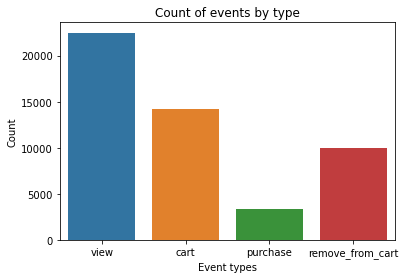

In [7]:
sns.countplot(x = "event_type", data = data1)
plt.xlabel("Event types")
plt.ylabel("Count")
plt.title("Count of events by type")
plt.show()

### Question 6:
### A new dataframe named session_data must be created where each row will represent a visit to the website and include the following columns:
#### a. User_id
#### b. User_session - the session identifier
#### c. funnel_number
#### d. index_in_funnel
#### e. The total number of events performed by the user in that visit
#### f. The duration of the visit to the site
#### g. list_of_viewed - list of products viewed by the user during the visit
#### h. list_of_added_to_cart – the list of products added to the cart during the visit
#### i. list_of_purchased – the list of products purchased during the visit

In [8]:
# Copy and group by for count the events per user session
data6= data2.copy()
data6['total_events']= data1.groupby('user_session')['event_type'].transform('count')

# Group by for the duration for each user session
data6f = data6.groupby('user_session')
data6f = data6f['event_time'].max() - data6f['event_time'].min()
data6 = pd.merge(data6, data6f, on='user_session', how='right')

# Fix column after the merge
data6 = data6.rename(columns={'event_time_y': 'session_duration'})

In [9]:
# Group by and pivot to create the columns by the eventy type
data6ghi = data6.groupby(['user_session','event_type']).agg({'product_id': lambda x: list(set(x))}).reset_index()
temp = data6ghi.pivot_table(index='user_session', columns='event_type', values='product_id', aggfunc='first').reset_index()
data6.drop_duplicates(subset='user_session', inplace=True)
data6 = pd.merge(data6, temp, on='user_session', how='right')

# Change the name of the columns by the assigment
data6.columns = ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session', 'duration_to_next_event', 'duration_days', 'bigger_than5', 'funnel_number', 'total_events', 'session_duration', 'list_of_added_to_cart', 'list_of_purchased', 'remove_from_cart', 'list_of_viewed']
data6 = pd.merge(data6, data_for_6, on='user_session', how='right')

# Drop the not neccesry columns
session_data= data6.drop(['event_time', 'event_type', 'product_id', 'category_id','duration_to_next_event', 'category_code', 'brand', 'price', 'duration_days', 'bigger_than5', 'remove_from_cart'], axis=1)
session_data.dropna(subset=['user_id'], inplace=True)
session_data

,user_id,user_session,funnel_number,total_events,session_duration,list_of_added_to_cart,list_of_purchased,list_of_viewed,index_in_funnel
0,9794320.0,1caa56ab-bd6f-4e0f-957a-30d19ba4f4c0,1.0,1.0,0 days,[5724658],NaN,NaN,1
1,9794320.0,566c4346-f4d4-420f-a2b7-a41ffbfb0dcd,1.0,1.0,0 days,NaN,NaN,[5724282],2
2,9794320.0,09894a4f-860e-448c-83d5-691590d28617,2.0,1.0,0 days,NaN,NaN,[5896429],1
3,10968431.0,14322711-e16b-4758-ab71-148fce9275d5,1.0,1.0,0 days,NaN,NaN,[5853467],1
4,13392135.0,597b95ff-4964-44f7-a259-6028b45c6f9c,1.0,1.0,0 days,NaN,NaN,[5869134],1
...,...,...,...,...,...,...,...,...,...
41920,579939864.0,9793cd23-fcfc-4247-ad0f-92f69c3dcabe,1.0,1.0,0 days,NaN,NaN,[5847375],1
41921,579940874.0,2a7f6dbb-c094-4093-bd7b-bbce7c8226f9,1.0,1.0,0 days,NaN,NaN,[5678031],1
41922,579941782.0,81fdea41-9148-4a30-88ec-de62c1cf369a,1.0,1.0,0 days,NaN,NaN,[5730225],1
41923,579954181.0,fd210c75-4236-4a8c-a894-cd2ec852e765,1.0,1.0,0 days,[5677990],NaN,NaN,1
